In [ ]:
#https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

'''
Description:
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenge against its detection is how to classify tumors into malignant (cancerous) or benign(non-cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.
'''

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read into DataFrame
df = pd.read_csv('breast_cancer.csv')


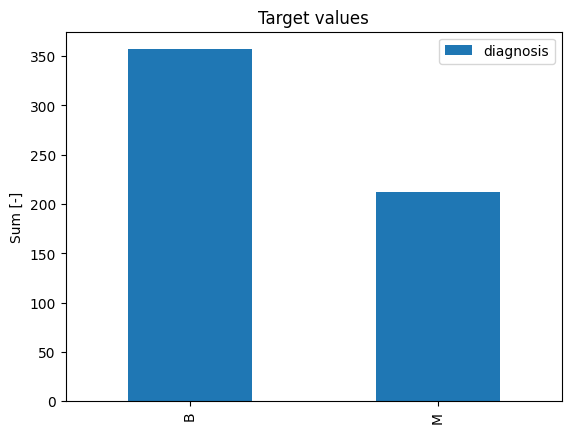

In [6]:
##################################
#Balanced imbalanced target values
##################################

#ploting taget values
bar_graph=df['diagnosis'].value_counts().plot(kind='bar')
#Title
plt.title('Target values')
#plt.xlabel('x axis name')
plt.ylabel('Sum [-]')
#Show legend
plt.legend() 
#Show plot
plt.show()

In [7]:
#categorical values
categ_columns = df.select_dtypes(exclude=[np.number])
categ_columns.describe()

,diagnosis
count,569
unique,2
top,B
freq,357


In [8]:
#get a closer look at categorical values
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
#enable to see all columns in a notebook
pd.set_option('display.max_columns', None)

#enable to see all rows in a notebook
pd.set_option('display.max_rows', None)

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
##################
#RUN STATS - HOW MANY NaN
##################
df.isnull().sum().sort_values(ascending = False)[0:20]


id                      0
diagnosis               0
symmetry_worst          0
concave points_worst    0
concavity_worst         0
compactness_worst       0
smoothness_worst        0
area_worst              0
perimeter_worst         0
texture_worst           0
radius_worst            0
fractal_dimension_se    0
symmetry_se             0
concave points_se       0
concavity_se            0
compactness_se          0
smoothness_se           0
area_se                 0
perimeter_se            0
texture_se              0
dtype: int64

In [12]:
#change categorical
df['diagnosis'].replace('M', 1,inplace=True)
df['diagnosis'].replace('B', 0,inplace=True)

In [31]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [13]:
#defining input=X and output=y for models
input=df.drop(['diagnosis'], axis=1)
output=df[['diagnosis']]

#independant
X=input

#dependant
y=output

In [14]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [15]:
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model = [
    DecisionTreeClassifier(max_depth=3, criterion='entropy'),
    RandomForestClassifier(n_estimators=3, criterion='entropy'),
    AdaBoostClassifier(n_estimators=3),
    GradientBoostingClassifier(n_estimators=3, max_depth=3),
    XGBClassifier(n_estimators=3, max_depth=3),
    CatBoostClassifier(depth=3, silent=True),
    GaussianNB(priors=None, var_smoothing=1e-09),
    KNeighborsClassifier(),
    LogisticRegression(),
    LGBMClassifier()
]

In [16]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

#Preperation for the table
col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
for a in model:
    
    #fitting and predicting
    a.fit(X_train, y_train)
    pred = a.predict(X_test)

    #Evaluating
    cv = cross_val_score(a, X_test, y_test).mean()
    accu_train = accuracy_score(y_train, a.predict(X_train)) #another way: a.score(X_test, y_test)
    accu_test = accuracy_score(y_test, pred) #another way: a.score(X_test, y_test)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    #definding the table
    Alg = a.__class__.__name__
    algorithms.loc[idx, 'Algorithm'] = Alg
    algorithms.loc[idx, 'AUC Score'] = round(auc * 100, 2)
    algorithms.loc[idx, 'CV Score'] = round(cv * 100, 2)
    algorithms.loc[idx, 'Accuracy [train]'] = round(accu_train * 100, 2)
    algorithms.loc[idx, 'Accuracy [test]'] = round(accu_test * 100, 2)
    algorithms.loc[idx, 'F1 Score'] = round(f1 * 100, 2)
   

    idx+=1

C:\Users\macab\AppData\Local\Temp\ipykernel_10828\4012740840.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  a.fit(X_train, y_train)
c:\Users\macab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\macab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\macab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py

In [17]:
#printing the accuracy results 
algorithms.sort_values(by='AUC Score', ascending=False)

,Algorithm,AUC Score,CV Score,Accuracy [train],Accuracy [test],F1 Score
2,AdaBoostClassifier,96.51,93.79,96.26,97.37,96.39
5,CatBoostClassifier,95.81,92.06,99.78,96.49,95.24
0,DecisionTreeClassifier,95.35,92.92,98.02,96.49,95.12
4,XGBClassifier,95.10,92.92,97.58,95.61,94.12
9,LGBMClassifier,95.10,93.83,100.00,95.61,94.12
1,RandomForestClassifier,93.94,93.83,98.90,94.74,92.86
3,GradientBoostingClassifier,91.86,92.92,95.60,93.86,91.14
7,KNeighborsClassifier,71.11,66.48,84.18,75.44,62.16
8,LogisticRegression,50.00,62.29,62.86,62.28,0.00
6,GaussianNB,49.30,47.27,62.86,61.40,0.00


In [ ]:
#######################################
#Plot ROC curves
#######################################
#https://github.com/dataprofessor/code/blob/master/python/ROC_curve.ipynb

In [60]:
#define the list of models

model=[     CatBoostClassifier(depth=3, silent=True),
            XGBClassifier(n_estimators=3, max_depth=3),
            LGBMClassifier()
        ]

In [61]:
#import library
from sklearn.metrics import roc_curve

#model fit
model[0].fit(X_train, y_train)
model[1].fit(X_train, y_train)
model[2].fit(X_train, y_train)

#Prediction
predict_1 = model[0].predict(X_test)
predict_2 = model[1].predict(X_test)
predict_3 = model[2].predict(X_test)

c:\Users\macab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\macab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
#Area under curve
model_auc_1 = roc_auc_score(y_test, predict_1)
model_auc_2 = roc_auc_score(y_test, predict_2)
model_auc_3 = roc_auc_score(y_test, predict_3)

#ROC curve
fpr_1, tpr_1, _ = roc_curve(y_test, predict_1)
auc_score_1=round(model_auc_1*100,3)

fpr_2, tpr_2, _ = roc_curve(y_test, predict_2)
auc_score_2=round(model_auc_2*100,3)

fpr_3, tpr_3, _ = roc_curve(y_test, predict_3)
auc_score_3=round(model_auc_3*100,3)

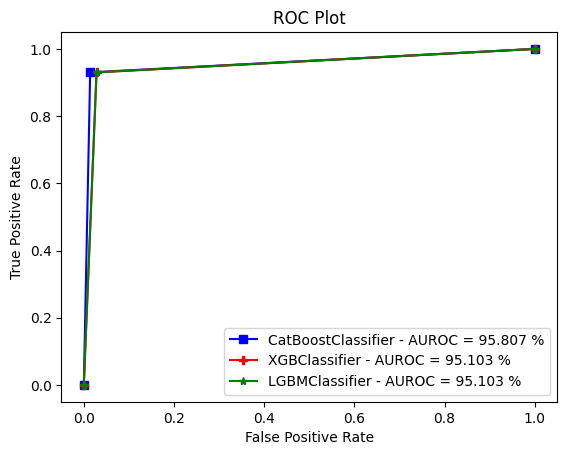

In [63]:
#Plot chart
#The number of points depend on the number of unique values in the input.
plt.plot(fpr_1, tpr_1, marker='s',color="blue", label=f"{model[0].__class__.__name__} - AUROC = {auc_score_1} %")
plt.plot(fpr_2, tpr_2, marker='P', color="red", label=f"{model[1].__class__.__name__} - AUROC = {auc_score_2} %")
plt.plot(fpr_3, tpr_3, marker='*',color="green", label=f"{model[2].__class__.__name__} - AUROC = {auc_score_3} %")

#Title
plt.title('ROC Plot')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show legend
plt.legend() 
#Show plot
plt.show()

c:\Users\macab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\macab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\macab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarnin

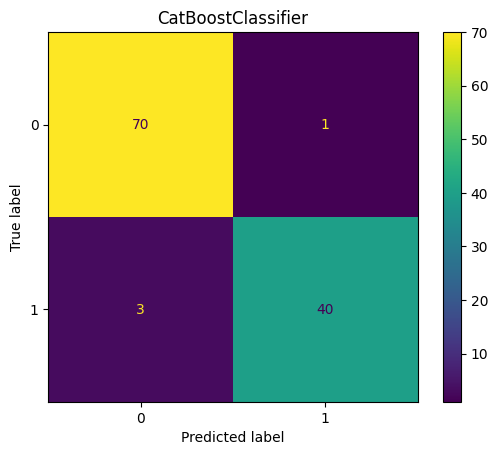

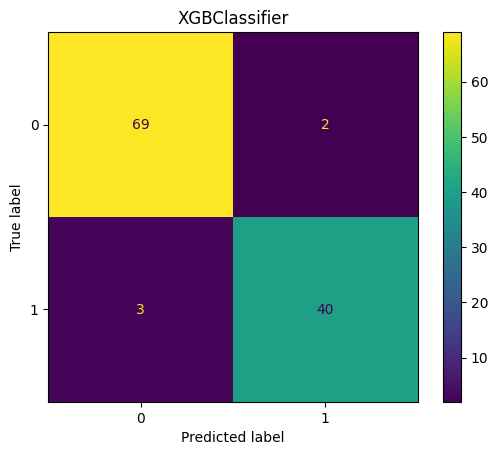

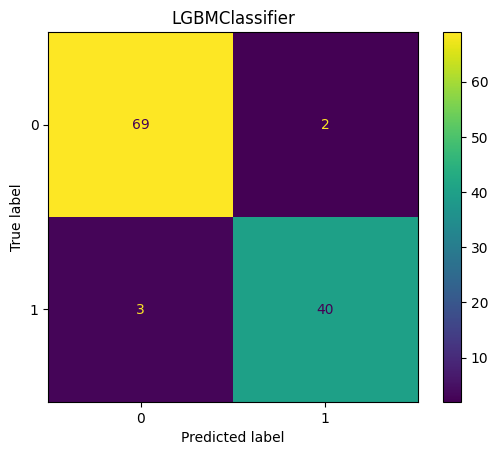

In [69]:
##############
#Confusion Matrix
##############

from sklearn.metrics import plot_confusion_matrix

#model
clf_1=model[0]
clf_2=model[1]
clf_3=model[2]

#fitting the model
model[0].fit(X_train, y_train)
model[1].fit(X_train, y_train)
model[2].fit(X_train, y_train)

#plot the matrix
plot_confusion_matrix(clf_1, X_test, y_test)
plt.title(model[0].__class__.__name__)

plot_confusion_matrix(clf_2, X_test, y_test) 
plt.title(model[1].__class__.__name__)

plot_confusion_matrix(clf_3, X_test, y_test)  
plt.title(model[2].__class__.__name__)

plt.show()